<a href="https://colab.research.google.com/github/pinky-thakur/EDA_Capstone_Telecom_Churn/blob/main/Copy_of_Telecom_churn_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

### We will approch the problem following  the step as mentioned below:

### <b>Importing Important required libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# loading csv File path
file_path = '/content/Telecom Churn (2).csv'

# Reading dataset from "Telecom Churn.csv" using pandas read_csv
df = pd.read_csv(file_path)

We'll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let's read the data (using read_csv), and take a look at the first 5 lines using the head method:

In [6]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### **Last 5 Rows**

In [7]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### Shape of given dataset

In [8]:
df.shape

(3333, 20)

In [9]:
print('Number of Columns',df.shape[1])
print('Number of Rows',df.shape[0])

Number of Columns 20
Number of Rows 3333


<b>Columns present in given dataset</b>

In [10]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**Info of given dataset**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<b>Different statistical points of given dataset</b>

In [12]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

<b>Statistical points of categorical variables</b>

In [14]:
df.describe(include = 'object')

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

<b>Getting the numerical and categorical columns present in given dataset</b>

In [15]:
categorical_cols = df.select_dtypes(include = 'object').columns

print('Categorical columns present in given dataset\n',
      categorical_cols.tolist())

print('\nNumber of categorical columns :',len(categorical_cols))

Categorical columns present in given dataset
 ['State', 'International plan', 'Voice mail plan']

Number of categorical columns : 3


In [16]:
numerical_cols = df.select_dtypes(include = 'number').columns

print('Numerical columns present in given dataset\n',
      numerical_cols.tolist())

print('\nNumber of Numerical columns :',len(numerical_cols))

Numerical columns present in given dataset
 ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']

Number of Numerical columns : 16


<b>Checking the missing values in given dataset</b>

In [17]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## <b>Inference :</b>

* There is no missing values present in our data

<b>Checking duplicate data</b>

In [18]:
df[df.duplicated()].shape

(0, 20)

## <b>Inference :</b>

* No duplicate data is present in our dataset

<b>Univariate Analysis</b>

<b>Analysing Voice mail plan column</b>

In [19]:
df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

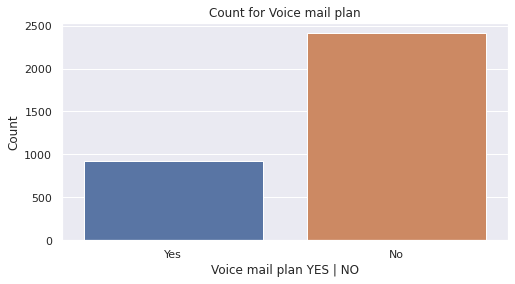

In [20]:
# Visualizing the same Voice mail plan

plt.figure(figsize = (8,4))
sns.set()
plt.title('Count for Voice mail plan')

sns.countplot(df['Voice mail plan'])
plt.xlabel('Voice mail plan YES | NO')
plt.ylabel('Count')

plt.show()

### <b>Observation: </b>

* In this graph after visualizing  for voice mail plan we can see the the very less amount of people have (Yes) voice mail plan and mostly people have (No) plan for voice mail.

<b>Analysing International plan column</b>

In [21]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

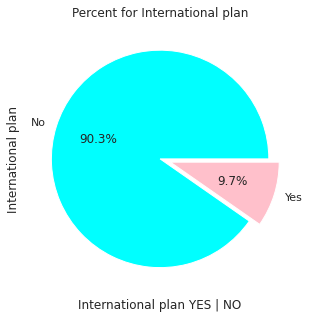

In [22]:
# Visualizing the same International plan

plt.figure(figsize = (10,5))
sns.set()
plt.title('Percent for International plan')

df['International plan'].value_counts().plot(kind = 'pie', 
                                             autopct = '%1.1f%%',
                                            explode = [0,0.1],colors = ['cyan','pink'])
plt.xlabel('International plan YES | NO')

plt.show()

### <b>Observation: </b>

* In this pie chart we can see the 90.3% people don't (No) have International plan,

* only  9.7% of people have(Yes) international plan

<b>Analysing Churn column</b>

In [23]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

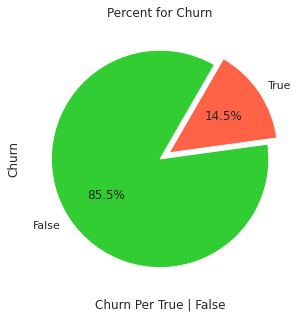

In [24]:
# Visualizing the same Churn

plt.figure(figsize = (10,5))
sns.set()
plt.title('Percent for Churn')

df['Churn'].value_counts().plot(kind = 'pie',
                                autopct = '%1.1f%%',
                                explode = [0,0.1],
                                colors = ['limegreen','tomato'],
                               startangle=60)
plt.xlabel('Churn Per True | False')

plt.show()

### <b>Observation: </b>

* In this pie chart churn percentage viz True is 14.5%

* And churn percentage viz False is 85.5%.

<b>Analysing Customer service calls column</b>

In [25]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

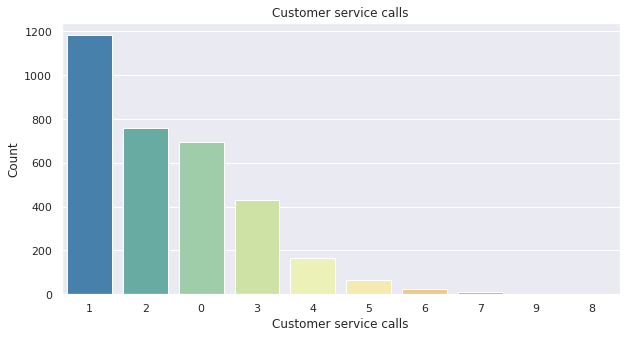

In [26]:
# Visualizing the same Customer service calls

plt.figure(figsize = (10,5))
sns.set()
plt.title('Customer service calls')

sns.countplot(df['Customer service calls'],
              order = df['Customer service calls'].value_counts().index,
             palette = 'Spectral_r')

plt.xlabel('Customer service calls')
plt.ylabel('Count')

plt.show()

### <b>Observation: </b>

* If custormer service calls are 1 and 2 then the  count is higher and there is very low rate of customer serivce call more than 3. 

<b>Analyzing Area code</b>

In [27]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

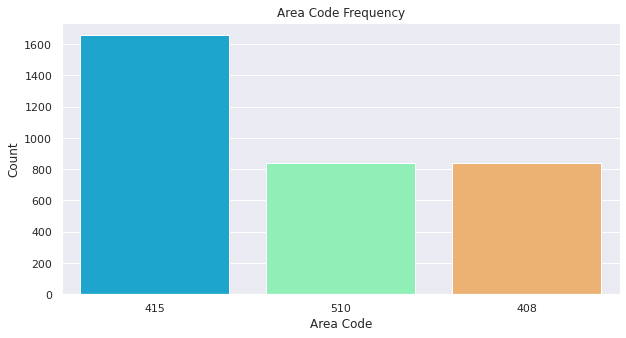

In [28]:
# Visualizing the same Area Code

plt.figure(figsize = (10,5))
sns.set()
plt.title('Area Code Frequency')

sns.countplot(df['Area code'],
              order = df['Area code'].value_counts().index,
             palette = 'rainbow')

plt.xlabel('Area Code')
plt.ylabel('Count')

plt.show()

### <b>Observation: </b>

* In this chart the Area code of Frequency 415 has the highest Frequency and 510 and 408 has the similar Area Frequency Code.

<b>Analyzing State</b>

In [29]:
df.head(1)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3                2.7   

   Customer service calls  Churn  
0                       1  False

In [30]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

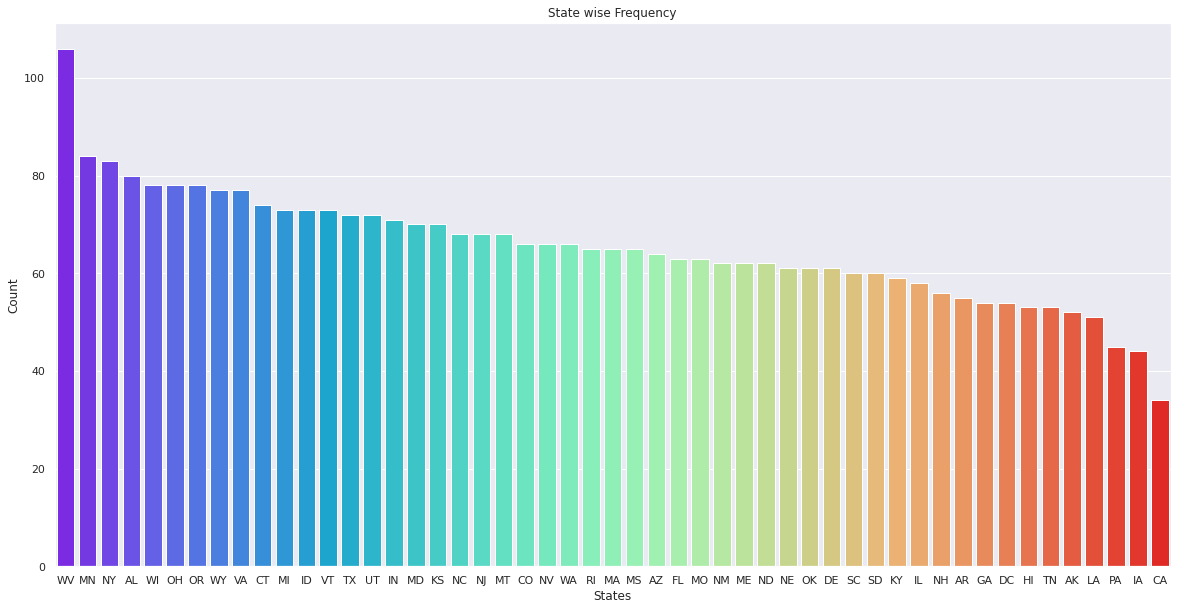

In [31]:
# Visualizing the same State

plt.figure(figsize = (20,10))
sns.set()
plt.title('State wise Frequency')

sns.countplot(df['State'],
              order = df['State'].value_counts().index,
              palette = 'rainbow')

plt.xlabel('States')
plt.ylabel('Count')

plt.show()

### <b>Observation: </b>

* In this graph the WV state has the highest frequency and the CA state has the lowest frequency.

In [32]:
len(numerical_cols)

16

**Outlier Analysis**

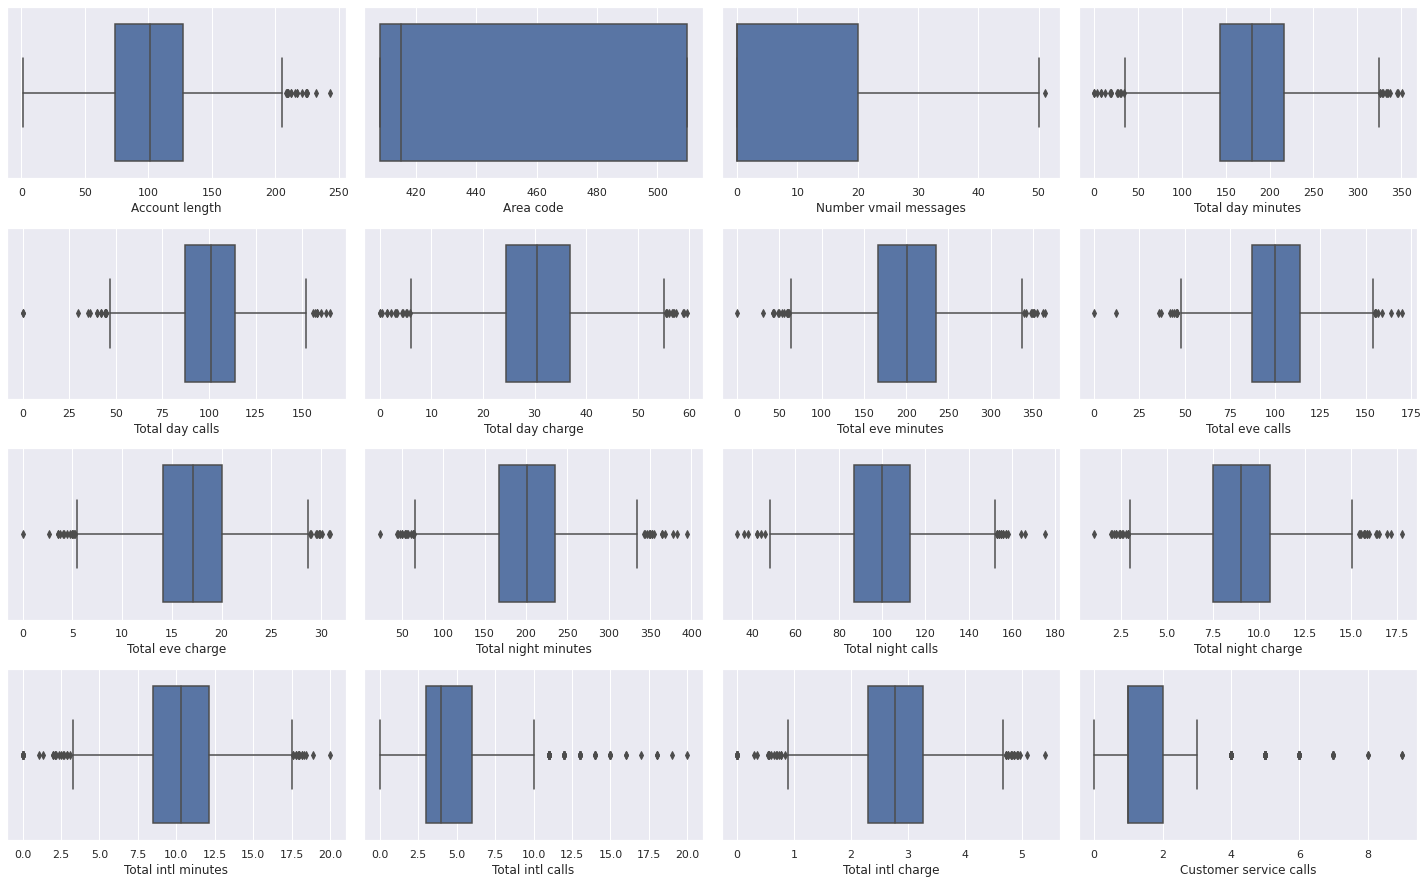

In [33]:
plt.figure(figsize=(20,15))
count= 1
for col in numerical_cols:   
    
    plt.subplot(5,4,count)
    
    count += 1
    sns.boxplot(df[col])
    
    plt.tight_layout()

### <b>Observation: </b>

* In this analyses we can see (Account length, International plan, Voice mail plan, Number vmail messages, Total day minutes	


* Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls. 


* Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls) all the cloumns have outlier  except Area code. 

<b>Analyzing the distribution</b>

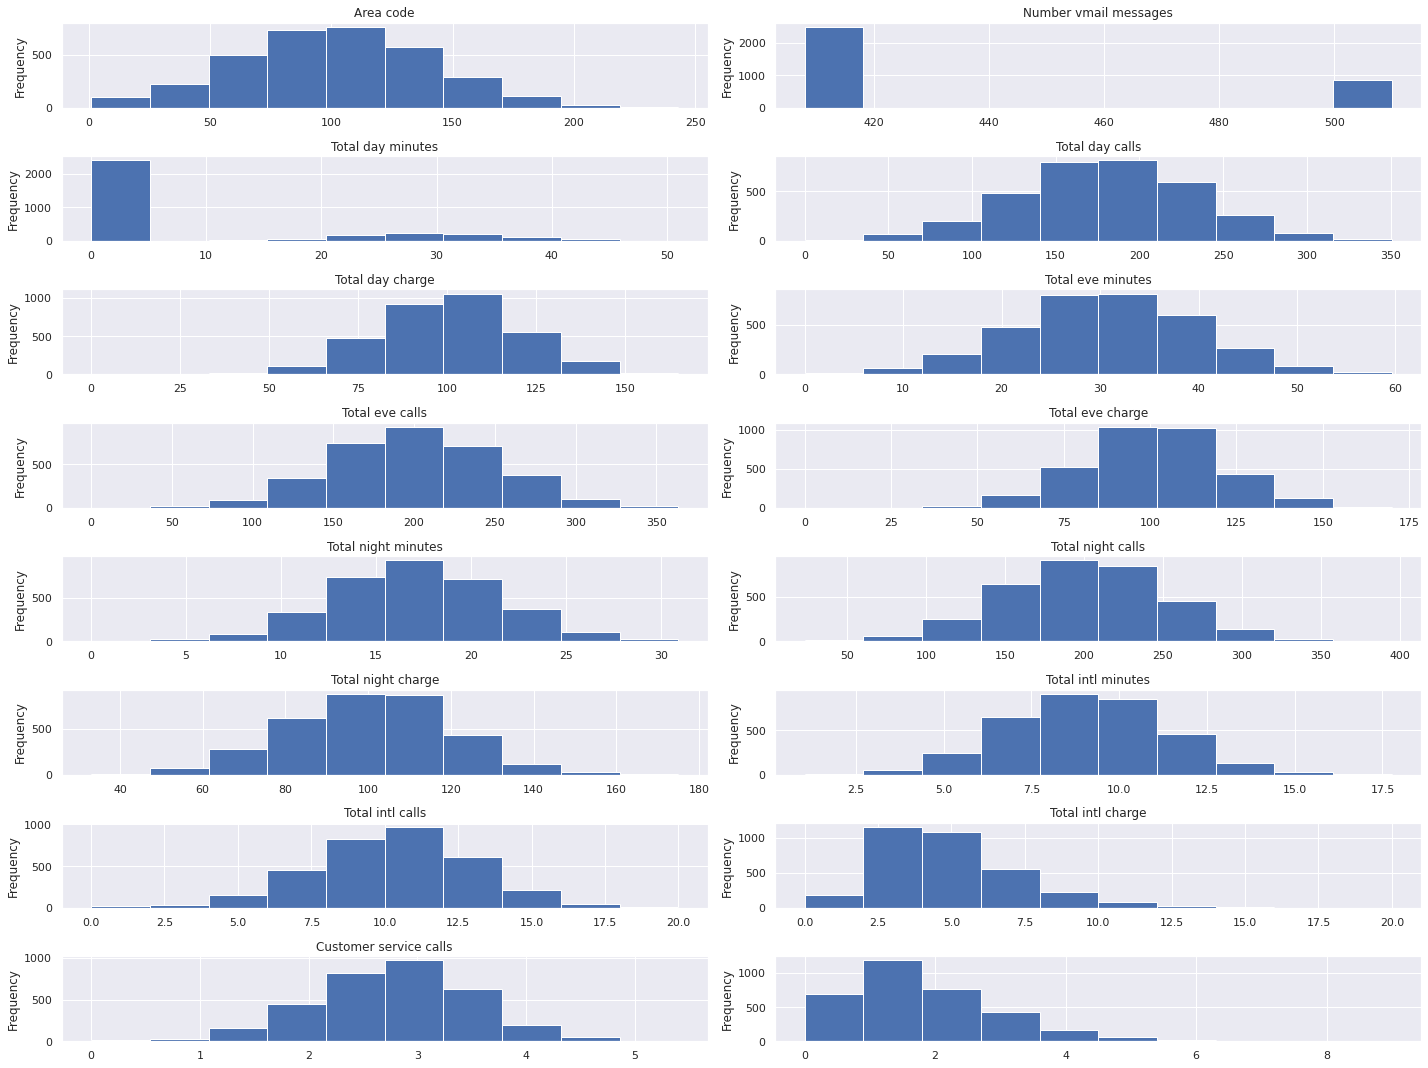

In [34]:
plt.figure(figsize=(20,15))
count= 1
for col in numerical_cols:   
    
    plt.title(col)
    plt.subplot(8,2,count)
    count += 1
    df[col].plot(kind = 'hist')
    plt.tight_layout()
    

### <b>Observation: </b>

* Total daily minutes, total intl charge and number vmail messages are not properly distributed.


* And all other variables are almost nomally distributed

<b>Bivariate and Multivariate Analysis</b>

### <b>Comparing all categorical variables with churn column</b>

In [35]:
categorical_cols

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

================================================== State vs Churn ==================================================


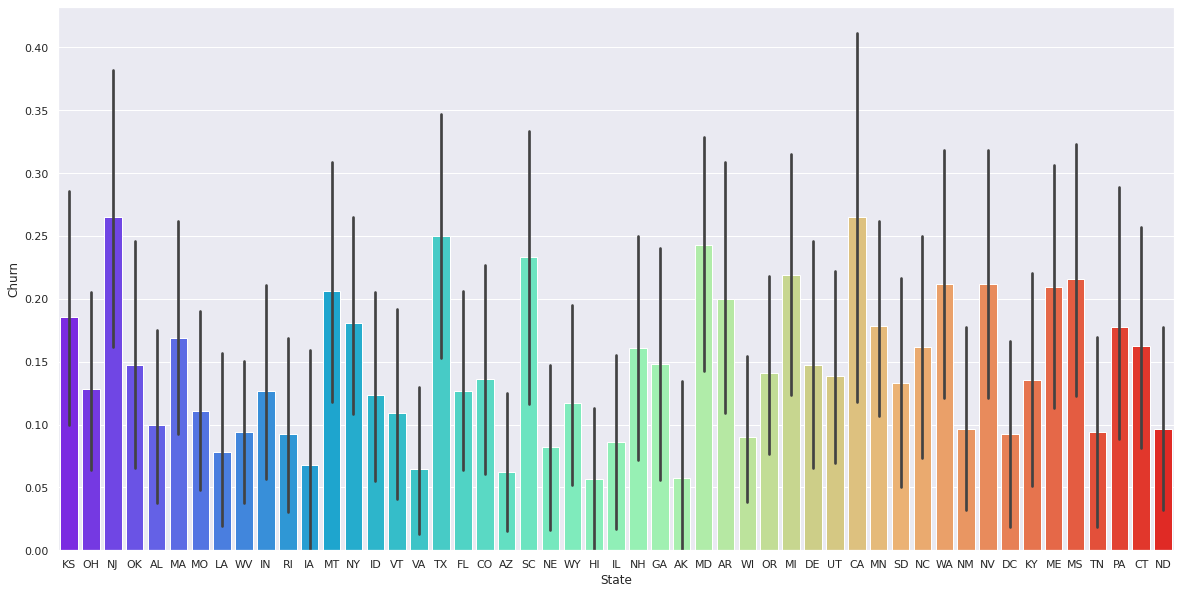

================================================== International plan vs Churn ==================================================


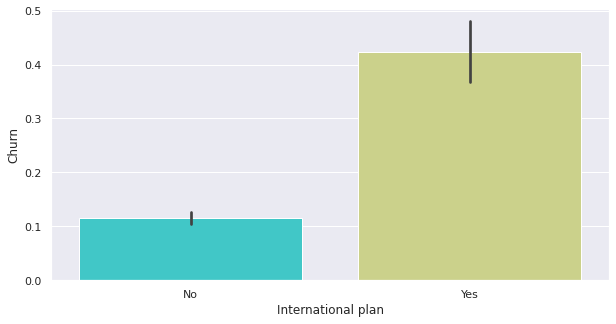

================================================== Voice mail plan vs Churn ==================================================


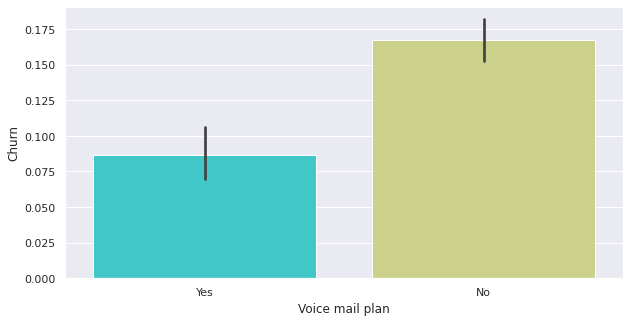

In [36]:
num = 1
for i in categorical_cols:
    if i == 'State':
        print('='*50,i,'vs Churn','='*50)
        plt.figure(figsize = (20,10))
        sns.barplot(df[i],df['Churn'],palette='rainbow')
    else: 
        print('='*50,i,'vs Churn','='*50)
        plt.figure(figsize = (10,5))
        sns.barplot(df[i],df['Churn'],palette='rainbow')
    plt.show()

### <b>Observation: </b>

* NJ, MA, MT, TX, SC, MD, CA and WA states are having the high rate of CHURN 


* International Plan has very high rate of Churn rate


* Voice mail plan has the very low rate of churn.

In [37]:
df.head(2)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3                2.7   
1                13.7                 3                3.7   

   Customer service calls  Churn  
0                       1  False  
1                       1  False

<b>Analysing Average Number vmail messages with Churn rate reason wise </b> 

In [38]:
def average_rate(column):
    return df.groupby(['Area code','Churn'])[column].mean()

<b>Analyzing Number vmail messages</b>

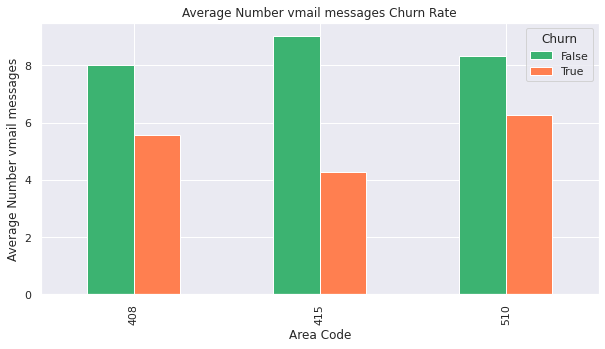

In [39]:
average_rate('Number vmail messages').unstack().plot(kind = 'bar',
                                                    figsize= (10,5),color = ['mediumseagreen','coral'])

plt.title('Average Number vmail messages Churn Rate')
plt.xlabel('Area Code')
plt.ylabel('Average Number vmail messages')

plt.show()

### <b>Observation: </b>

* In this graph the Average Number vmail messages churn Rate  False rate has high in 415 area code and True rate is high in 510 Area code.

In [40]:
numerical_cols

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

<b>Analysing Total day minutes</b>

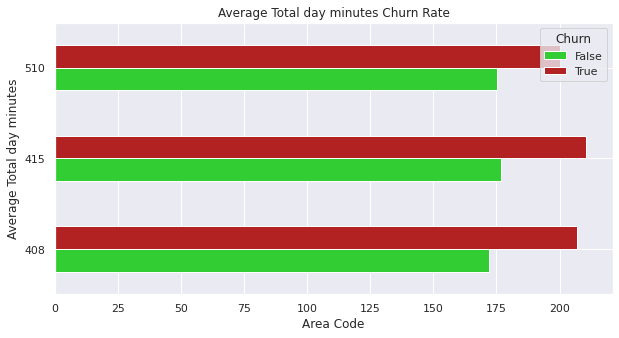

In [41]:
average_rate('Total day minutes').unstack().plot(kind = 'barh',
                                                    figsize= (10,5),color = ['limegreen','firebrick'])

plt.title('Average Total day minutes Churn Rate')
plt.xlabel('Area Code')
plt.ylabel('Average Total day minutes')

plt.show()

### <b>Observation: </b>

* In this graph the 415 Area code False/True of average total day minute churn rate has high. 

<b>Analysing Total day calls</b>

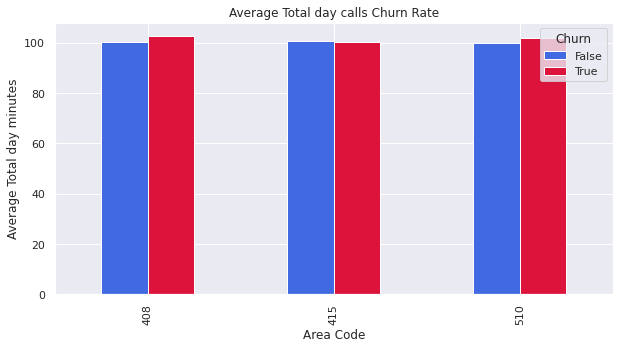

In [42]:
average_rate('Total day calls').unstack().plot(kind = 'bar',
                                                    figsize= (10,5),color = ['royalblue','crimson'])

plt.title('Average Total day calls Churn Rate')
plt.xlabel('Area Code')
plt.ylabel('Average Total day minutes')

plt.show()

### <b>Observation: </b>

* In the graph here the Average Total day calls Churn False Rate has similar in all area code and True rate has high in 408 and 510 and 415 has low area code.

<b>Analysing Total eve calls</b>

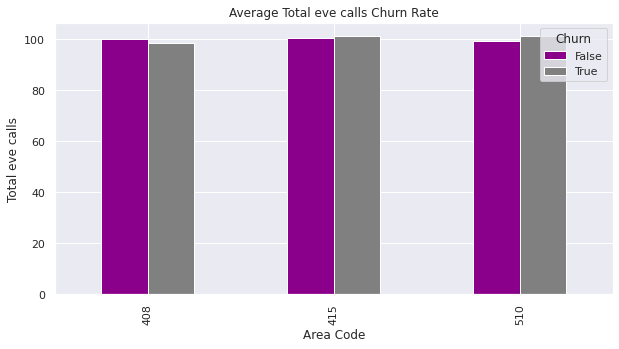

In [43]:
average_rate('Total eve calls').unstack().plot(kind = 'bar',
                                                    figsize= (10,5),color = ['darkmagenta','gray'])

plt.title('Average Total eve calls Churn Rate')
plt.xlabel('Area Code')
plt.ylabel('Total eve calls')

plt.show()

### <b>Observation: </b>

* This graph we analysing the Average Total evening calls churn False rate has same in all the Area code and the True rate has  little high in Area code 510.

<b>Analyzing the varaible Total intl minutes</b>

In [44]:
df[(df['International plan'] == 'Yes')]['Total intl minutes'].describe()

count    323.000000
mean      10.628173
std        2.697787
min        1.300000
25%        9.000000
50%       10.800000
75%       12.200000
max       20.000000
Name: Total intl minutes, dtype: float64

In [45]:
# Churn rate for customers with international plan and talktime above 11 minutes
round(df[(df['International plan'] == 'Yes') & (df['Total intl minutes'] >= 12) & (df['Churn'] == True)]['Total intl minutes'].count() / df[(df['International plan'] == 'Yes')  & (df['Total intl minutes'] >= 12) ]['Total intl minutes'].count()*100,2)

70.97

In [46]:
# Churn rate for customers with international plan and talktime less than 12 minutes
round(df[(df['International plan'] == 'Yes') & (df['Total intl minutes'] < 12) & (df['Churn'] == True)]['Total intl minutes'].count() / df[(df['International plan'] == 'Yes')  & (df['Total intl minutes'] < 12) ]['Total intl minutes'].count()*100,2)

30.87

### <b>Observation: </b> 

* For the customers having International Plan those with longer talk time (>=12 min) have a higher chance of leaving than those with less talk time.

<b>Voice mail plan Vs Churn Rate</b>

In [51]:
# Voice mail plan
df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [50]:
voice_plan_churn = df[['Voice mail plan','Churn']].value_counts().unstack()
voice_plan_churn

Churn            False  True
Voice mail plan             
No                2008   403
Yes                842    80

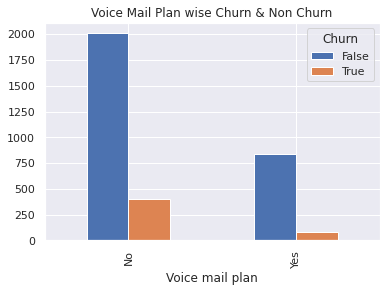

In [53]:
voice_plan_churn.plot(kind='bar')
plt.title('Voice Mail Plan wise Churn & Non Churn')
plt.show()

In [54]:
# churn rate for customers with no voice mail plan 
round(voice_plan_churn.iloc[0,1]/(voice_plan_churn.iloc[0,0]+voice_plan_churn.iloc[0,1])*100,2)

16.72

In [55]:
# churn rate for customers with voice mail plan 
round(voice_plan_churn.iloc[1,1]/(voice_plan_churn.iloc[1,0]+voice_plan_churn.iloc[1,1])*100,2)

8.68

### <b>Observation: </b>

* We can see that for the customers with no voice mail plan, there is some chance of leaving the subscription.

<b> Pair plot for the dataset</b>

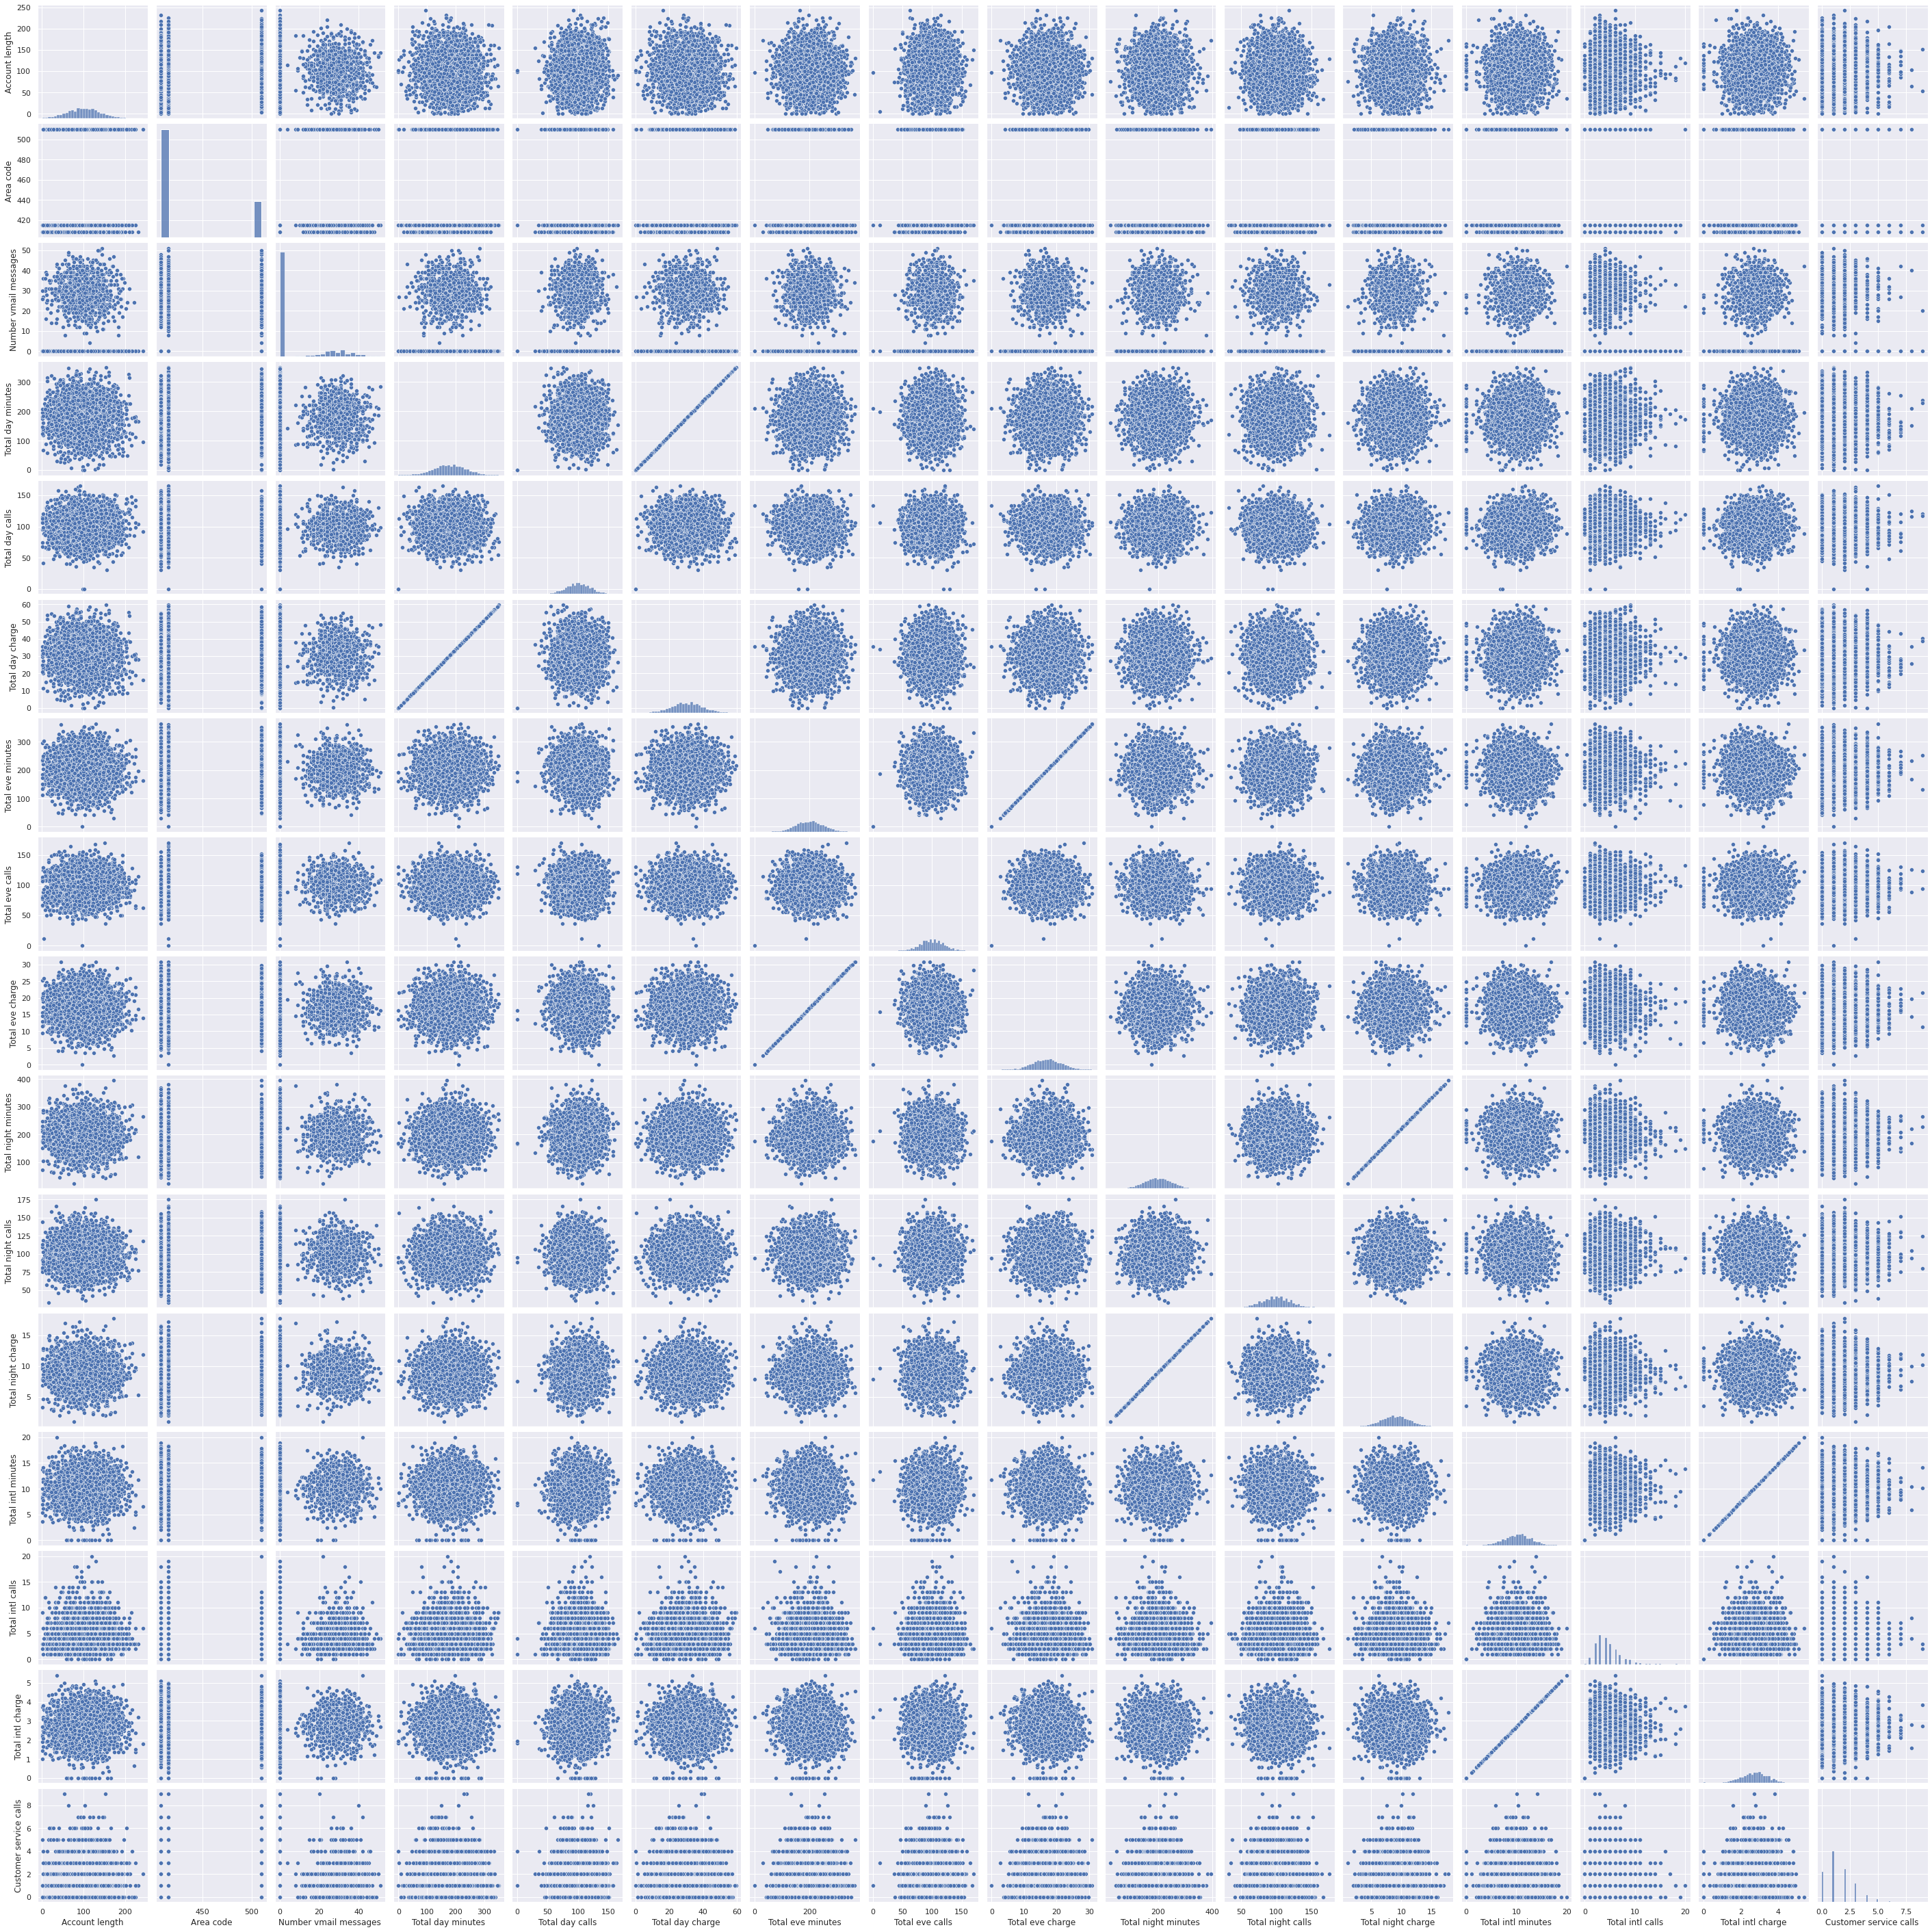

In [56]:
sns.pairplot(df.select_dtypes(include = 'number'))
plt.show()

<b>Checking correation of of features</b>

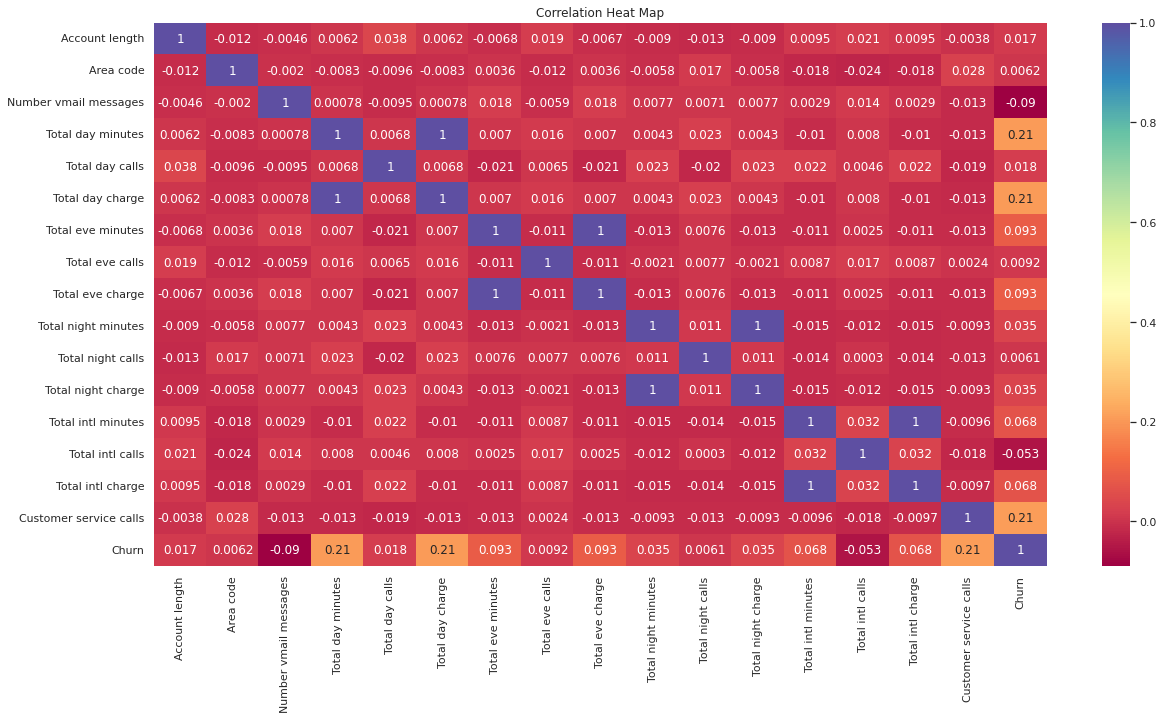

In [57]:
correlation = df.corr()

plt.figure(figsize=(20,10))

plt.title('Correlation Heat Map')

sns.heatmap(correlation, annot = True, cmap = 'Spectral')

plt.show()

## <b>Inference :</b>

* Here we can observe Total night charge is highly correlated with total night minutes, and total eve charge is highly correlated with total eve minutes, total day charge is higly correlated with total day minutes


* Also total intl calls is highly correlated with total intl minutes.

### <b>Conclusion:</b>

* In conclusion, we can see that the most influential factors when it comes to churn are international plan, voice mail plan, total day minutes, total day calls, total night minutes, total night calls, total intl minutes, total intl calls.



* And customer service calls. Customers with an international plan have a higher risk of churning, while customers with a voice mail plan have a lower risk. Total day minutes, total day calls, total night minutes, total night calls, total intl minutes, total intl calls, and customer service calls all have an impact on churn rate. Furthermore.



* we can see that the average total day minutes churn rate has the highest rate in the 415 area code, the average total day calls churn rate is similar in all area codes, and the average total evening calls churn rate has a higher rate in the 510 area code. Additionally, customers with an international plan who have longer talk time have a higher chance of leaving than those with less talk time, and customers with no voice mail plan have a chance of leaving their subscription. Lastly, we can see that total night charge is highly correlated with total night minutes.


* Total eve charge is highly correlated with total eve minutes, and total day charge is highly correlated with total day minutes, as well as total intl calls is highly correlated with total intl minutes.


* Customers are increasingly opting out of voice mail plans, with only 9.7% of customers currently having one. Churn rates are highest for those customers with international plans, at 14.5%, while those without international plans have a churn rate of only 85.5%. Customers with fewer customer service calls are less likely to leave, with a count much higher for those with calls of 1 and 2. 



* Area code 415 has the highest frequency while California has the lowest frequency, and NJ, MA, MT, TX, SC, MD, CA, and WA all have higher churn rates. International plans have a much higher churn rate than voice mail plans, and customers with longer talk times who have international plans are also more likely to leave. 



* Total daily minutes, total international charge and number of voice mail messages are not properly distributed, but all other variables are close to normal distribution. Total night charge is highly correlated with total night minutes, total eve charge is highly correlated with total eve minutes, and total day charge is highly correlated with total day minutes. Similarly, total international calls is highly correlated with total international minutes.